# Group 5 final project

## Citations
- https://datahub.io/sports-data/english-premier-league#resource-season-1819
- https://rstudio-pubs-static.s3.amazonaws.com/338127_f85723bf6d9b4637a4c5e1ff8f838432.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Combining multiple datasets

In [3]:
tables = []
for i in os.listdir('./english-premier-league_zip/archive/'):
     f = os.path.join('./english-premier-league_zip/archive/', i)
     print(f)
     df = pd.read_csv(f)
     tables.append(df)
df1 = pd.concat(tables)
df1


./english-premier-league_zip/archive/season-1011.csv
./english-premier-league_zip/archive/season-1112.csv
./english-premier-league_zip/archive/season-1213.csv
./english-premier-league_zip/archive/season-1415.csv
./english-premier-league_zip/archive/season-1516.csv
./english-premier-league_zip/archive/season-1617.csv


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSH,PSD,PSA,PSCH,PSCD,PSCA
0,E0,14/08/10,Aston Villa,West Ham,3.0,0.0,H,2.0,0.0,H,...,1.45,1.40,3.00,2.78,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,14/08/10,Blackburn,Everton,1.0,0.0,H,1.0,0.0,H,...,2.20,2.05,1.85,1.75,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,14/08/10,Bolton,Fulham,0.0,0.0,D,0.0,0.0,D,...,1.60,1.55,2.56,2.36,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,14/08/10,Chelsea,West Brom,6.0,0.0,H,2.0,0.0,H,...,2.06,2.01,1.91,1.85,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,14/08/10,Sunderland,Birmingham,2.0,2.0,D,1.0,0.0,H,...,1.64,1.55,2.50,2.38,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,21/05/17,Liverpool,Middlesbrough,3.0,0.0,H,1.0,0.0,H,...,2.02,1.97,1.95,1.90,1.14,9.31,27.82,1.15,10.50,19.09
376,E0,21/05/17,Man United,Crystal Palace,2.0,0.0,H,2.0,0.0,H,...,2.19,2.11,1.85,1.79,2.44,3.40,3.14,2.35,3.38,3.35
377,E0,21/05/17,Southampton,Stoke,0.0,1.0,A,0.0,0.0,D,...,2.03,1.98,1.93,1.88,1.80,3.95,4.73,1.64,4.37,5.53
378,E0,21/05/17,Swansea,West Brom,2.0,1.0,H,0.0,1.0,A,...,2.11,2.06,1.86,1.82,2.10,3.68,3.67,2.29,3.45,3.40


### Level 1 data cleaning

Drop these columns 
- DIV HC AC HR AR HY AY

In [4]:
drop_columns = 'Div|HC|AC|HR|AR|HY|AY|Referee'
df1 = df1.iloc[:, 0:23]
df1 = df1.loc[:,~df1.columns.str.contains(drop_columns)]

df1.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF
0,14/08/10,Aston Villa,West Ham,3.0,0.0,H,2.0,0.0,H,23.0,12.0,11.0,2.0,15.0,15.0
1,14/08/10,Blackburn,Everton,1.0,0.0,H,1.0,0.0,H,7.0,17.0,2.0,12.0,19.0,14.0
2,14/08/10,Bolton,Fulham,0.0,0.0,D,0.0,0.0,D,13.0,12.0,9.0,7.0,12.0,13.0
3,14/08/10,Chelsea,West Brom,6.0,0.0,H,2.0,0.0,H,18.0,10.0,13.0,4.0,10.0,10.0
4,14/08/10,Sunderland,Birmingham,2.0,2.0,D,1.0,0.0,H,6.0,13.0,2.0,7.0,13.0,10.0


##### codeable and intuative column names 

In [5]:
df1 = df1.rename(columns={'Date':'Game_Date','HomeTeam':'Home_Team', 'AwayTeam':'Away_Team', 'FTHG':'Full_Time_Home_Team_Goals', 'FTAG':'Full_Time_Away_Team_Goals',
                          'FTR':'Full_Time_Result', 'HTHG':'Half_Time_Home_Team_Goals', 'HTAG':'Half_Time_Away_Team_Goals', 'HTR':'Half_Time_Result',
                          'HS':'Home_Team_Shots','AS':'Away_Team_Shots', 'HST':'Home_Team_Shots_on_Target', 'AST': 'Away_Team_Shots_on_Target',
                          'HF':'Home_Fouls', 'AF':'Away_Fouls'})

df1.head()

,Game_Date,Home_Team,Away_Team,Full_Time_Home_Team_Goals,Full_Time_Away_Team_Goals,Full_Time_Result,Half_Time_Home_Team_Goals,Half_Time_Away_Team_Goals,Half_Time_Result,Home_Team_Shots,Away_Team_Shots,Home_Team_Shots_on_Target,Away_Team_Shots_on_Target,Home_Fouls,Away_Fouls
0,14/08/10,Aston Villa,West Ham,3.0,0.0,H,2.0,0.0,H,23.0,12.0,11.0,2.0,15.0,15.0
1,14/08/10,Blackburn,Everton,1.0,0.0,H,1.0,0.0,H,7.0,17.0,2.0,12.0,19.0,14.0
2,14/08/10,Bolton,Fulham,0.0,0.0,D,0.0,0.0,D,13.0,12.0,9.0,7.0,12.0,13.0
3,14/08/10,Chelsea,West Brom,6.0,0.0,H,2.0,0.0,H,18.0,10.0,13.0,4.0,10.0,10.0
4,14/08/10,Sunderland,Birmingham,2.0,2.0,D,1.0,0.0,H,6.0,13.0,2.0,7.0,13.0,10.0


##### Reformatting dates

In [6]:
df1['Game_Date'] = pd.to_datetime(df1['Game_Date'])
df1.head()

,Game_Date,Home_Team,Away_Team,Full_Time_Home_Team_Goals,Full_Time_Away_Team_Goals,Full_Time_Result,Half_Time_Home_Team_Goals,Half_Time_Away_Team_Goals,Half_Time_Result,Home_Team_Shots,Away_Team_Shots,Home_Team_Shots_on_Target,Away_Team_Shots_on_Target,Home_Fouls,Away_Fouls
0,2010-08-14,Aston Villa,West Ham,3.0,0.0,H,2.0,0.0,H,23.0,12.0,11.0,2.0,15.0,15.0
1,2010-08-14,Blackburn,Everton,1.0,0.0,H,1.0,0.0,H,7.0,17.0,2.0,12.0,19.0,14.0
2,2010-08-14,Bolton,Fulham,0.0,0.0,D,0.0,0.0,D,13.0,12.0,9.0,7.0,12.0,13.0
3,2010-08-14,Chelsea,West Brom,6.0,0.0,H,2.0,0.0,H,18.0,10.0,13.0,4.0,10.0,10.0
4,2010-08-14,Sunderland,Birmingham,2.0,2.0,D,1.0,0.0,H,6.0,13.0,2.0,7.0,13.0,10.0


In [7]:
idx = (df1['Game_Date'].dt.year >= 2010) & (df1['Game_Date'].dt.year <= 2013)
idx2 = (df1['Game_Date'].dt.year >= 2014) & (df1['Game_Date'].dt.year <= 2017)
df1.loc[idx, 'Coach_Name'] = 'Sir Alex Ferguson'
df1.loc[idx2, 'Coach_Name'] = 'Others'

### Create Man United tables

In [8]:
BM = (df1.Home_Team == 'Man United') 
BM2 =  (df1.Away_Team == 'Man United')
man_u_home_df = df1[BM]
man_u_away_df = df1[BM2]

### Level 2 data cleaning 
#### Data Re-coding 

In [9]:
man_u_home_df = man_u_home_df.loc[:,~man_u_home_df.columns.str.contains('Away')]
man_u_away_df = man_u_away_df.loc[:,~man_u_away_df.columns.str.contains('Home')]
man_u_home_df.head()

,Game_Date,Home_Team,Full_Time_Home_Team_Goals,Full_Time_Result,Half_Time_Home_Team_Goals,Half_Time_Result,Home_Team_Shots,Home_Team_Shots_on_Target,Home_Fouls,Coach_Name
9,2010-08-16,Man United,3.0,H,2.0,H,18.0,10.0,9.0,Sir Alex Ferguson
23,2010-08-28,Man United,3.0,H,1.0,H,18.0,11.0,6.0,Sir Alex Ferguson
48,2010-09-19,Man United,3.0,H,1.0,H,16.0,7.0,15.0,Sir Alex Ferguson
74,2010-10-16,Man United,2.0,D,2.0,H,16.0,9.0,10.0,Sir Alex Ferguson
94,2010-10-30,Man United,2.0,H,1.0,H,18.0,10.0,12.0,Sir Alex Ferguson


In [10]:
col = man_u_home_df.pop('Coach_Name')
col2 = man_u_away_df.pop('Coach_Name')
man_u_home_df.insert(1, 'Coach_Name', col)
man_u_away_df.insert(1, 'Coach_Name', col2)
man_u_home_df.head()

,Game_Date,Coach_Name,Home_Team,Full_Time_Home_Team_Goals,Full_Time_Result,Half_Time_Home_Team_Goals,Half_Time_Result,Home_Team_Shots,Home_Team_Shots_on_Target,Home_Fouls
9,2010-08-16,Sir Alex Ferguson,Man United,3.0,H,2.0,H,18.0,10.0,9.0
23,2010-08-28,Sir Alex Ferguson,Man United,3.0,H,1.0,H,18.0,11.0,6.0
48,2010-09-19,Sir Alex Ferguson,Man United,3.0,H,1.0,H,16.0,7.0,15.0
74,2010-10-16,Sir Alex Ferguson,Man United,2.0,D,2.0,H,16.0,9.0,10.0
94,2010-10-30,Sir Alex Ferguson,Man United,2.0,H,1.0,H,18.0,10.0,12.0


In [11]:
man_u_home_df = man_u_home_df.rename(columns={'Home_Team':'Team_Name', 'Full_Time_Home_Team_Goals': 'Full_Time_Goals','Half_Time_Home_Team_Goals':'Half_Team_Goals', 
                                              'Home_Team_Shots':'Team_Shots', 'Home_Team_Shots_on_Target':'Shots_on_Target', 'Home_Fouls':'Team_Fouls' })
man_u_home_df.head()

,Game_Date,Coach_Name,Team_Name,Full_Time_Goals,Full_Time_Result,Half_Team_Goals,Half_Time_Result,Team_Shots,Shots_on_Target,Team_Fouls
9,2010-08-16,Sir Alex Ferguson,Man United,3.0,H,2.0,H,18.0,10.0,9.0
23,2010-08-28,Sir Alex Ferguson,Man United,3.0,H,1.0,H,18.0,11.0,6.0
48,2010-09-19,Sir Alex Ferguson,Man United,3.0,H,1.0,H,16.0,7.0,15.0
74,2010-10-16,Sir Alex Ferguson,Man United,2.0,D,2.0,H,16.0,9.0,10.0
94,2010-10-30,Sir Alex Ferguson,Man United,2.0,H,1.0,H,18.0,10.0,12.0


In [12]:
mapping = {'H': 'Win', 'A': 'Loss', 'D': 'Draw'}
man_u_home_df['Full_Time_Result'] = man_u_home_df["Full_Time_Result"].map(mapping)
man_u_home_df['Half_Time_Result'] = man_u_home_df["Half_Time_Result"].map(mapping)
man_u_home_df.head()

,Game_Date,Coach_Name,Team_Name,Full_Time_Goals,Full_Time_Result,Half_Team_Goals,Half_Time_Result,Team_Shots,Shots_on_Target,Team_Fouls
9,2010-08-16,Sir Alex Ferguson,Man United,3.0,Win,2.0,Win,18.0,10.0,9.0
23,2010-08-28,Sir Alex Ferguson,Man United,3.0,Win,1.0,Win,18.0,11.0,6.0
48,2010-09-19,Sir Alex Ferguson,Man United,3.0,Win,1.0,Win,16.0,7.0,15.0
74,2010-10-16,Sir Alex Ferguson,Man United,2.0,Draw,2.0,Win,16.0,9.0,10.0
94,2010-10-30,Sir Alex Ferguson,Man United,2.0,Win,1.0,Win,18.0,10.0,12.0


In [13]:
man_u_away_df.head()

,Game_Date,Coach_Name,Away_Team,Full_Time_Away_Team_Goals,Full_Time_Result,Half_Time_Away_Team_Goals,Half_Time_Result,Away_Team_Shots,Away_Team_Shots_on_Target,Away_Fouls
17,2010-08-22,Sir Alex Ferguson,Man United,2.0,D,1.0,A,14.0,7.0,6.0
31,2010-11-09,Sir Alex Ferguson,Man United,3.0,D,1.0,D,13.0,8.0,18.0
57,2010-09-26,Sir Alex Ferguson,Man United,2.0,D,1.0,D,12.0,6.0,18.0
62,2010-02-10,Sir Alex Ferguson,Man United,0.0,D,0.0,D,10.0,4.0,6.0
89,2010-10-24,Sir Alex Ferguson,Man United,2.0,A,1.0,A,12.0,5.0,13.0


In [14]:
man_u_away_df = man_u_away_df.rename(columns={'Away_Team':'Team_Name', 'Full_Time_Away_Team_Goals': 'Full_Time_Goals','Half_Time_Away_Team_Goals':'Half_Team_Goals', 
                                              'Away_Team_Shots':'Team_Shots', 'Away_Team_Shots_on_Target':'Shots_on_Target', 'Away_Fouls':'Team_Fouls' })
man_u_away_df.head()

,Game_Date,Coach_Name,Team_Name,Full_Time_Goals,Full_Time_Result,Half_Team_Goals,Half_Time_Result,Team_Shots,Shots_on_Target,Team_Fouls
17,2010-08-22,Sir Alex Ferguson,Man United,2.0,D,1.0,A,14.0,7.0,6.0
31,2010-11-09,Sir Alex Ferguson,Man United,3.0,D,1.0,D,13.0,8.0,18.0
57,2010-09-26,Sir Alex Ferguson,Man United,2.0,D,1.0,D,12.0,6.0,18.0
62,2010-02-10,Sir Alex Ferguson,Man United,0.0,D,0.0,D,10.0,4.0,6.0
89,2010-10-24,Sir Alex Ferguson,Man United,2.0,A,1.0,A,12.0,5.0,13.0


In [15]:
mapping = {'H': 'Loss', 'A': 'Win', 'D': 'Draw'}
man_u_away_df['Full_Time_Result'] = man_u_away_df["Full_Time_Result"].map(mapping)
man_u_away_df['Half_Time_Result'] = man_u_away_df["Half_Time_Result"].map(mapping)
man_u_away_df.head()

,Game_Date,Coach_Name,Team_Name,Full_Time_Goals,Full_Time_Result,Half_Team_Goals,Half_Time_Result,Team_Shots,Shots_on_Target,Team_Fouls
17,2010-08-22,Sir Alex Ferguson,Man United,2.0,Draw,1.0,Win,14.0,7.0,6.0
31,2010-11-09,Sir Alex Ferguson,Man United,3.0,Draw,1.0,Draw,13.0,8.0,18.0
57,2010-09-26,Sir Alex Ferguson,Man United,2.0,Draw,1.0,Draw,12.0,6.0,18.0
62,2010-02-10,Sir Alex Ferguson,Man United,0.0,Draw,0.0,Draw,10.0,4.0,6.0
89,2010-10-24,Sir Alex Ferguson,Man United,2.0,Win,1.0,Win,12.0,5.0,13.0


In [16]:
manu_total = pd.concat([man_u_home_df, man_u_away_df])
manu_total = manu_total.sort_values(by='Game_Date', ascending=True)
manu_total = manu_total.reset_index(drop=True)
manu_total.head()

,Game_Date,Coach_Name,Team_Name,Full_Time_Goals,Full_Time_Result,Half_Team_Goals,Half_Time_Result,Team_Shots,Shots_on_Target,Team_Fouls
0,2010-02-10,Sir Alex Ferguson,Man United,0.0,Draw,0.0,Draw,10.0,4.0,6.0
1,2010-06-11,Sir Alex Ferguson,Man United,2.0,Win,1.0,Win,14.0,10.0,6.0
2,2010-08-16,Sir Alex Ferguson,Man United,3.0,Win,2.0,Win,18.0,10.0,9.0
3,2010-08-22,Sir Alex Ferguson,Man United,2.0,Draw,1.0,Win,14.0,7.0,6.0
4,2010-08-28,Sir Alex Ferguson,Man United,3.0,Win,1.0,Win,18.0,11.0,6.0


### Data Analysis

In [17]:
game_result_df = manu_total.groupby(['Full_Time_Result', 'Coach_Name'])['Full_Time_Result'].count()
game_result_df.head(10)

Full_Time_Result  Coach_Name       
Draw              Others               34
                  Sir Alex Ferguson    21
Loss              Others               23
                  Sir Alex Ferguson    14
Win               Others               57
                  Sir Alex Ferguson    79
Name: Full_Time_Result, dtype: int64

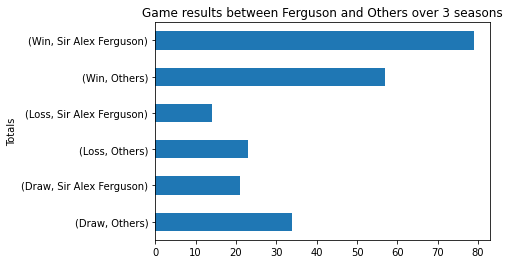

In [18]:
game_result_df.plot.barh(xlabel="Totals", ylabel='Result / Coach', title="Game results between Ferguson and Others over 3 seasons")
plt.show()

In [19]:
numerical_toals = manu_total.groupby('Coach_Name')['Full_Time_Goals', 'Team_Shots', 'Shots_on_Target', 'Team_Fouls'].sum()
numerical_toals.head()

C:\Users\ekowa\AppData\Local\Temp/ipykernel_16000/597077753.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  numerical_toals = manu_total.groupby('Coach_Name')['Full_Time_Goals', 'Team_Shots', 'Shots_on_Target', 'Team_Fouls'].sum()


,Full_Time_Goals,Team_Shots,Shots_on_Target,Team_Fouls
Coach_Name,,,,
Others,165.0,1528.0,532.0,1422.0
Sir Alex Ferguson,253.0,1647.0,978.0,1124.0


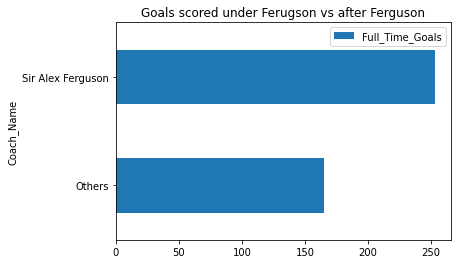

In [20]:
numerical_toals.plot.barh(y="Full_Time_Goals", title="Goals scored under Ferugson vs after Ferguson")
plt.show()

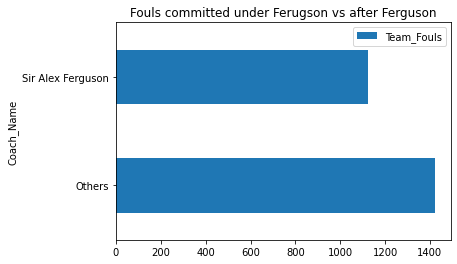

In [21]:
numerical_toals.plot.barh(y="Team_Fouls", title="Fouls committed under Ferugson vs after Ferguson")
plt.show()

In [22]:
numerical_avg = manu_total.groupby('Coach_Name')['Full_Time_Goals', 'Team_Shots', 'Shots_on_Target', 'Team_Fouls'].mean()
numerical_avg.head()

C:\Users\ekowa\AppData\Local\Temp/ipykernel_16000/2001219277.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  numerical_avg = manu_total.groupby('Coach_Name')['Full_Time_Goals', 'Team_Shots', 'Shots_on_Target', 'Team_Fouls'].mean()


,Full_Time_Goals,Team_Shots,Shots_on_Target,Team_Fouls
Coach_Name,,,,
Others,1.447368,13.403509,4.666667,12.473684
Sir Alex Ferguson,2.219298,14.447368,8.578947,9.859649


In [23]:
# Convert DataFrame to CSV file
manu_total.to_csv('manu_2010-2017.csv', index=True)

### Regression Analysis

#### Final dataframe 

In [28]:
# Use regression to find the most significant predictors for wins in Sir Alex Fergusen's dominant Man U
#manu_total.head()

# last home game 19 may 2013
Alex_Man_U = manu_total[(manu_total['Game_Date'] >= '2010-02-10') & (manu_total['Game_Date'] <= '2013-05-20')]
#Alex_Man_U

# make full time results and half time results numeric/ binary

Alex_Man_U['Full_Time_Result'] = Alex_Man_U['Full_Time_Result'].apply(lambda x: 1 if x == "Win" else(2 if x =='Draw' else 3))

Alex_Man_U['Half_Time_Result'] = Alex_Man_U['Half_Time_Result'].apply(lambda x: 1 if x == "Win" else(2 if x =='Draw' else 3))

Alex_Man_U

C:\Users\ekowa\AppData\Local\Temp/ipykernel_16000/3690615084.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alex_Man_U['Full_Time_Result'] = Alex_Man_U['Full_Time_Result'].apply(lambda x: 1 if x == "Win" else(2 if x =='Draw' else 3))
C:\Users\ekowa\AppData\Local\Temp/ipykernel_16000/3690615084.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alex_Man_U['Half_Time_Result'] = Alex_Man_U['Half_Time_Result'].apply(lambda x: 1 if x == "Win" else(2 if x =='Draw' else 3))


,Game_Date,Coach_Name,Team_Name,Full_Time_Goals,Full_Time_Result,Half_Team_Goals,Half_Time_Result,Team_Shots,Shots_on_Target,Team_Fouls
0,2010-02-10,Sir Alex Ferguson,Man United,0.0,2,0.0,2,10.0,4.0,6.0
1,2010-06-11,Sir Alex Ferguson,Man United,2.0,1,1.0,1,14.0,10.0,6.0
2,2010-08-16,Sir Alex Ferguson,Man United,3.0,1,2.0,1,18.0,10.0,9.0
3,2010-08-22,Sir Alex Ferguson,Man United,2.0,2,1.0,1,14.0,7.0,6.0
4,2010-08-28,Sir Alex Ferguson,Man United,3.0,1,1.0,1,18.0,11.0,6.0
...,...,...,...,...,...,...,...,...,...,...
106,2013-04-17,Sir Alex Ferguson,Man United,2.0,2,1.0,2,15.0,9.0,7.0
107,2013-04-22,Sir Alex Ferguson,Man United,3.0,1,3.0,1,10.0,5.0,10.0
108,2013-04-28,Sir Alex Ferguson,Man United,1.0,2,1.0,2,10.0,5.0,10.0
109,2013-05-05,Sir Alex Ferguson,Man United,0.0,3,0.0,2,10.0,4.0,14.0


In [30]:
import statsmodels.api as sm


# Find the p-value of each predictor to examine its significance to winning games

# Add an intercept column to the DataFrame
Alex_Man_U['Intercept'] = 1

# Select the predictors and the target variable
predictors = Alex_Man_U.drop(['Full_Time_Result',"Game_Date","Coach_Name","Team_Name", "Full_Time_Goals"], axis=1)
target = Alex_Man_U['Full_Time_Result'] == 1  # True for win, False otherwise

# Fit the logistic regression model using statsmodels
model = sm.Logit(target, predictors)
result = model.fit()

# Get the p-values for each predictor
p_values = result.pvalues

# Print the p-values
print(p_values)

Optimization terminated successfully.
         Current function value: 0.432533
         Iterations 6
Half_Team_Goals     0.395878
Half_Time_Result    0.003781
Team_Shots          0.562530
Shots_on_Target     0.619367
Team_Fouls          0.159076
Intercept           0.101630
dtype: float64


C:\Users\ekowa\AppData\Local\Temp/ipykernel_16000/2428169328.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alex_Man_U['Intercept'] = 1


From these predictors, only Half_Time_Result has a p-value of 0.05 or less. This means that in order to gratly influence a win on matchday Man United must make sure that they are not loosing by halftime. As such, with the style of play Sir Alex Ferguson prefers to use he has been able to win many games because his team are either drawn or winning by halftime.

### Takeaways / Explanantions